In [1]:
import pandas as pd
import numpy as np
import re

import importlib
import matplotlib.pyplot as plt
import collections

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_percentage_error

from xgboost import XGBRegressor
/
from sklearn.model_selection import  train_test_split
# import functions.model_wrapper

import pickle

In [2]:
import os
os.chdir('../')
from functions.model_wrapper import Tree_Model, xgboost_params

In [3]:
with open('data/X_train_transformed.pckl', 'rb') as f:
    X_train_transformed = pickle.load(f)
with open('data/X_val_transformed.pckl', 'rb') as f:
    X_val_transformed = pickle.load(f)  
with open('data/X_holdout_transformed.pckl', 'rb') as f:
    X_holdout_transformed = pickle.load(f)  


with open('data/y_train.pckl', 'rb') as f:
    y_train = pickle.load(f)
with open('data/y_val.pckl', 'rb') as f:
    y_val = pickle.load(f)
with open('data/y_holdout.pckl', 'rb') as f:
    y_holdout = pickle.load(f)

In [4]:
xgboost_params['eval_set'] = [(X_val_transformed, y_val)]

In [14]:
xgboost_params['learning_rate'] = xgboost_params['learning_rate']/10
xgboost_params['learning_rate'] 

0.00025

In [15]:
import importlib
# importlib.reload(functions.model_wrapper)

from functions.model_wrapper import Tree_Model, xgboost_params
gbm = Tree_Model(Model = XGBRegressor,
                 params = xgboost_params
                 )

In [ ]:
gbm.fit(X_train_transformed, y_train)

[0]	validation_0-rmse:33.13510


/Users/willtong/miniforge3/envs/env20240709/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:12:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "eval_set", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-rmse:33.13145
[2]	validation_0-rmse:33.12782
[3]	validation_0-rmse:33.12661
[4]	validation_0-rmse:33.12550
[5]	validation_0-rmse:33.12427
[6]	validation_0-rmse:33.12293
[7]	validation_0-rmse:33.11968
[8]	validation_0-rmse:33.11891
[9]	validation_0-rmse:33.11548
[10]	validation_0-rmse:33.11439
[11]	validation_0-rmse:33.11059
[12]	validation_0-rmse:33.10711
[13]	validation_0-rmse:33.10403
[14]	validation_0-rmse:33.10028
[15]	validation_0-rmse:33.09908
[16]	validation_0-rmse:33.09745
[17]	validation_0-rmse:33.09419
[18]	validation_0-rmse:33.09314
[19]	validation_0-rmse:33.08919
[20]	validation_0-rmse:33.08542
[21]	validation_0-rmse:33.08480
[22]	validation_0-rmse:33.08349
[23]	validation_0-rmse:33.07982
[24]	validation_0-rmse:33.07840
[25]	validation_0-rmse:33.07556
[26]	validation_0-rmse:33.07397
[27]	validation_0-rmse:33.07049
[28]	validation_0-rmse:33.06744
[29]	validation_0-rmse:33.06366
[30]	validation_0-rmse:33.06258
[31]	validation_0-rmse:33.06143
[32]	validation_0

In [7]:
with open('data/gbm_model.pckl', 'wb') as f:
    pickle.dump(gbm, f)

# with open('data/gbm_model.pckl', 'rb') as f:
#     gbm = pickle.load(f)

In [8]:
trained_xgboost_model = gbm.model

In [11]:
feature_importances = gbm.feature_imp


<class 'pandas.core.series.Series'>
type(y_actual) = <class 'pandas.core.series.Series'>
type(y_actual) = <class 'pandas.core.series.Series'>
self.y_data_type = <class 'pandas.core.series.Series'>
MdAPE is 31.589488536990874%
Plotting scatter plot..
R2: 0.380, RMSE: 31.026, MAE: 12.859


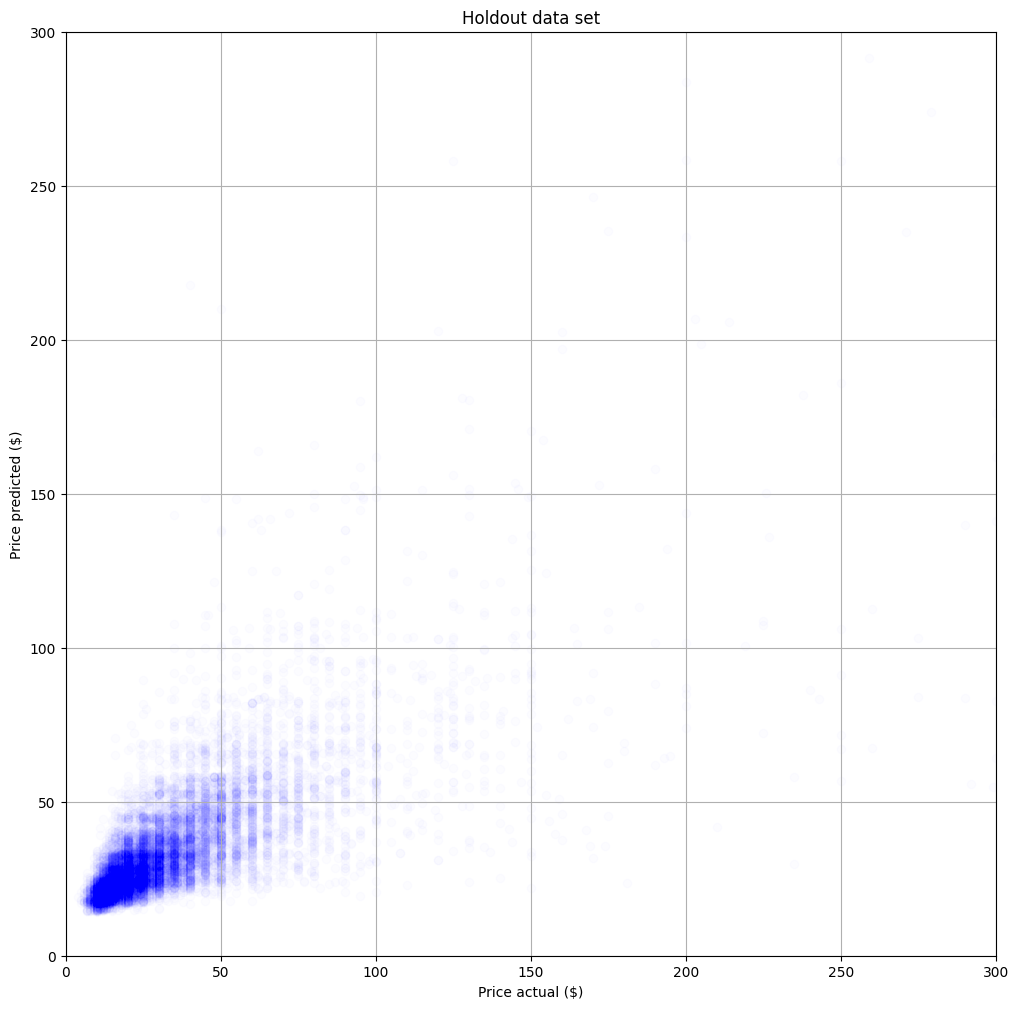

In [12]:
y_pred = gbm.predict(X_holdout_transformed, y_holdout)

In [9]:
# pred = rfm.predict(X_holdout_transformed)
import shap
explainer = shap.TreeExplainer(trained_xgboost_model
                              )
# with open('gbm_explainer_test.pckl', 'wb') as f:
#     pickle.dump(explainer, f)

# with open('data/gbm_explainer_test.pckl', 'rb') as f:
#     explainer = pickle.load(f)
print("TreeExplainer done", explainer)

TreeExplainer done <shap.explainers._tree.TreeExplainer object at 0x1530667b0>


In [10]:
year_features = [(feature, i) for i, feature in enumerate(X_train_transformed.columns) \
if ('title_2' in feature.lower() or 'title_19' in feature.lower()) and len(feature) == 10
                ]
#year_features
column_numbers_of_interest = [number for (name, number) in year_features]
column_names_of_interest = [name for (name, number) in year_features]

In [11]:
column_names_of_interest

['title_1997',
 'title_1998',
 'title_1999',
 'title_2000',
 'title_2001',
 'title_2002',
 'title_2003',
 'title_2004',
 'title_2005',
 'title_2006',
 'title_2007',
 'title_2008',
 'title_2009',
 'title_2010',
 'title_2011',
 'title_2012',
 'title_2013',
 'title_2014',
 'title_2015',
 'title_2016']

In [12]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
# explainer = shap.TreeExplainer(model)
skip_index_value = 1
shap_values = explainer.shap_values(X_holdout_transformed.iloc[::skip_index_value,:])


explanation = explainer(X=X_holdout_transformed.iloc[::skip_index_value,:],
                        y = y_holdout[:skip_index_value], 
                        # feature_perturbation = 'interventional',
                        check_additivity=False 
                       )
# with open('gbm_explanation_test.pckl', 'wb') as f:
#     pickle.dump(explanation, f)

explanation.values

array([[-6.50678110e+00,  3.64864623e-04,  6.34029508e-03, ...,
         1.07969798e-04, -7.34095043e-03, -5.60586527e-03],
       [-1.03449497e+01,  3.62889812e-04,  6.21241797e-03, ...,
         1.06382955e-04, -8.12180806e-03, -5.72490785e-03],
       [-6.94143200e+00,  3.64864623e-04,  6.29314221e-03, ...,
         1.07969798e-04, -7.37354113e-03, -5.72622474e-03],
       ...,
       [ 8.45302582e-01,  3.55675962e-04,  6.32041367e-03, ...,
         1.07969798e-04, -7.39441533e-03, -5.29378001e-03],
       [ 1.92088690e-02,  3.54803225e-04,  6.59631332e-03, ...,
         1.07969798e-04, -7.19664525e-03, -5.60298236e-03],
       [-4.13638163e+00,  3.64864623e-04, -1.40323816e-03, ...,
         1.11005756e-04, -9.35020670e-03, -4.86499770e-03]], dtype=float32)

In [13]:
shap_values = explanation.values

In [14]:
explanation_of_selected_columns = explanation[:,column_numbers_of_interest]
shap_values_selected_columns = explanation_of_selected_columns.values
# make sure the SHAP values add up to marginal predictions
# print("shap_values done", shap_values_selected_columns)

shap_values done [[ 0.00036486  0.0063403   0.00949054 ...  0.21457207  0.32459295
   0.10599839]
 [ 0.00036289  0.00621242  0.00949281 ...  0.20503986  0.28311652
   0.08270077]
 [ 0.00036486  0.00629314  0.00949603 ...  0.21153636  0.31720042
   0.10601471]
 ...
 [ 0.00035568  0.00632041  0.00949694 ...  0.21747899  0.34650826
   0.12391493]
 [ 0.0003548   0.00659631  0.00933365 ...  0.19078392  0.31236237
   0.11563597]
 [ 0.00036486 -0.00140324  0.00976083 ...  0.1886961   0.27676278
   0.10281623]]


In [20]:
shap.plots.initjs()

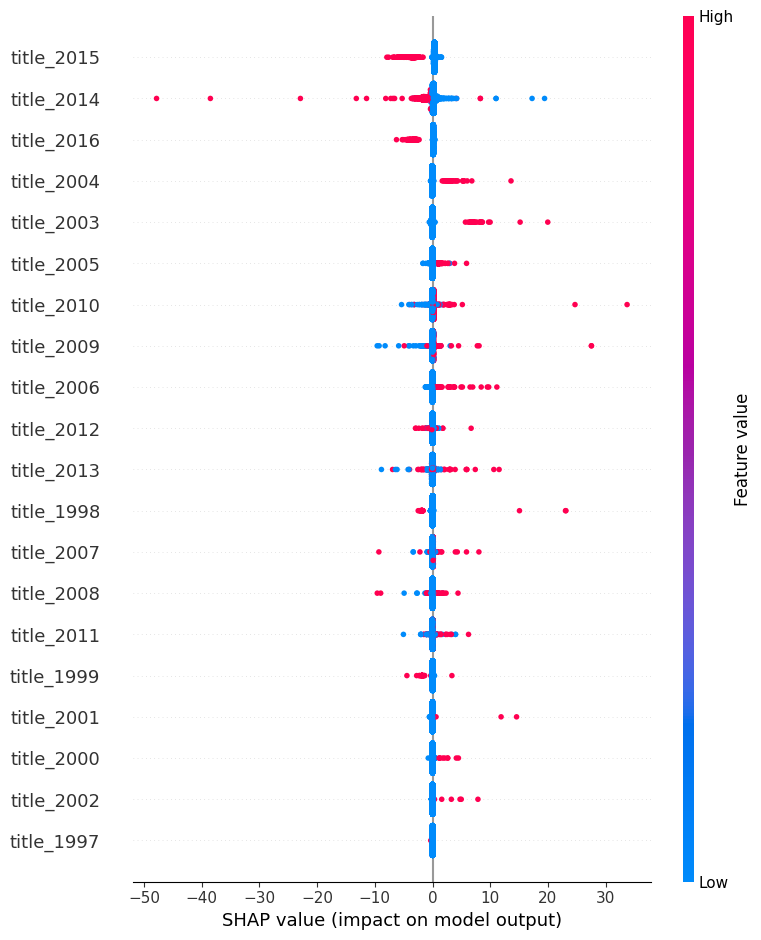

In [42]:
shap.summary_plot(shap_values_selected_columns, 
                  X_holdout_transformed.iloc[::skip_index_value, column_numbers_of_interest], 
                  # plot_type= 'bar',
                  max_display = 50)

In [33]:
X_holdout_transformed.iloc[::skip_index_value, features_w_year_indices]

,title_2014,title_2014&bordeaux,title_2014&cabernet,title_2014&chardonnay,title_2014&cuvée,title_2014&estate,title_2014&pinot,title_2014&red,title_2014&reserva,title_2014&reserve,title_2014&riesling,title_2014&rosé,title_2014&sauvignon,title_cellars&2014,title_estate&2014,title_fils&2014,title_vineyards&2014
87851,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
120496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17876,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
65358,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87888,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
40396,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
95122,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27249,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


[('province_Burgundy', 2734)]


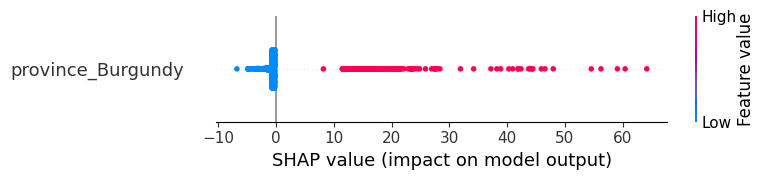

In [61]:
word = 'burgundy'
features_w_word = [(feature, i) for i, feature in enumerate(X_train_transformed.columns) 
                   if word in feature.lower() ]
features_w_word_indices = [feature_w_word[1] for feature_w_word in features_w_word]
print(features_w_word)

explanation_of_selected_columns = explanation[:,features_w_word_indices]
shap_values_selected_columns = explanation_of_selected_columns.values


shap.summary_plot(shap_values_selected_columns, 
                  X_holdout_transformed.iloc[::skip_index_value, features_w_word_indices], 
                  # plot_type= 'bar',
                  max_display = 50)

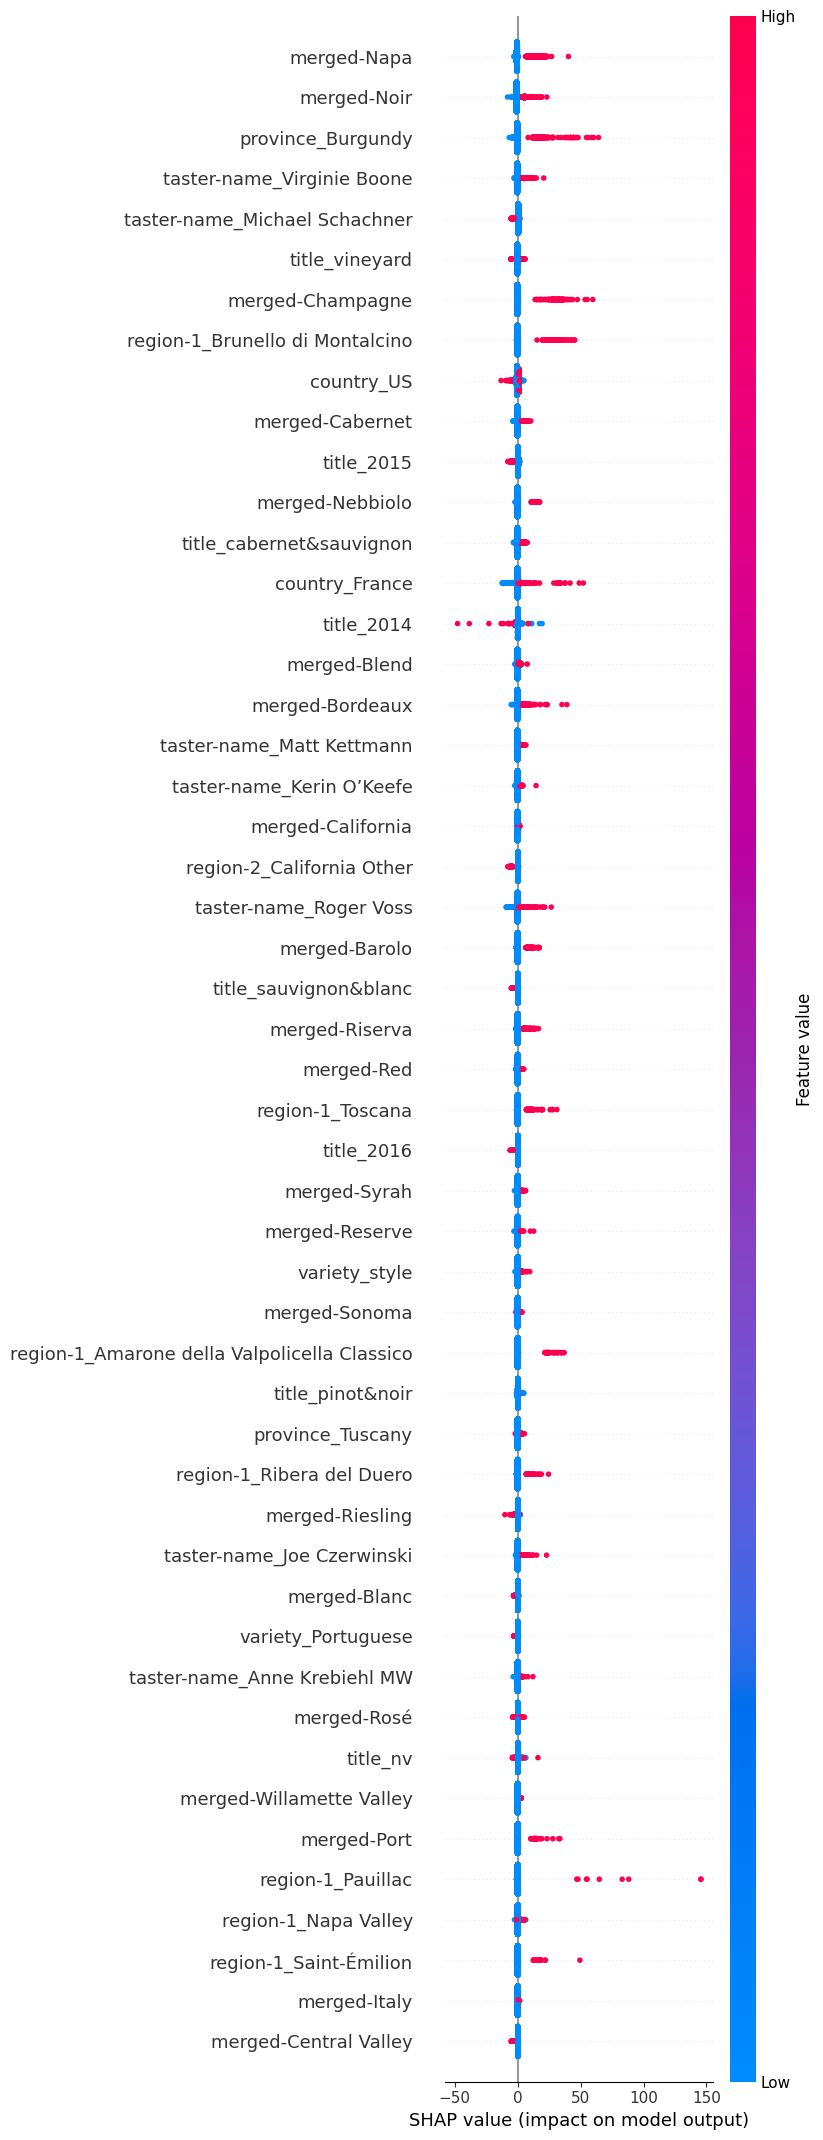

In [18]:
shap.summary_plot(shap_values[:,1::], X_holdout_transformed.iloc[::skip_index_value, 1::], 
                  max_display = 50)
# plt.xlim(0,200)
plt.show()

In [102]:
sample_number = np.random.randint(y_holdout.shape[0])
print(f'Actual price = {y_holdout.loc[index_number]}')

for feature in X_holdout_transformed.columns:
    if X_holdout_transformed.loc[index_number,:][feature] != False:
        print(feature, X_holdout_transformed.loc[index_number,:][feature])
    

shap.force_plot(explainer.expected_value, 
                shap_values[sample_number, :], 
                X_holdout_transformed.loc[index_number, :])

Actual price = 710
norm-points 2.1302697675953493
title_2014 True
title_olivier True
winery_Olivier Leflaive True
province_Burgundy True
country_France True
taster-name_Roger Voss True
merged-Chardonnay True


In [105]:
predicted_price = 0
counter = 1
y_holdout_predict = trained_xgboost_model.predict(X_holdout_transformed)
while predicted_price < 100:
    sample_number = np.random.randint( np.random.randint(y_holdout.shape[0]))
    predicted_price = y_holdout_predict[sample_number] 
    if predicted_price >= 100:
        index_number = X_holdout_transformed.iloc[::skip_index_value,:].index[sample_number]
        print(f"head predicted_price = {predicted_price}")
        print(f'Actual price = {y_holdout.iloc[sample_number]}')
        for feature in [x for x in X_holdout_transformed.columns[(X_holdout_transformed.iloc[sample_number,:] != 0).values].values[2:]]:
            print(feature)
        print(f'plot counter {counter}')
        
        break
    # sample_number = np.random.randint(X_holdout.shape[0])
    counter += 1
shap.force_plot(explainer.expected_value, 
                        shap_values[sample_number, :], 
                        X_holdout_transformed.loc[index_number, :])

head predicted_price = 106.19511413574219
Actual price = 150
title_cuvée&red
title_vineyards
title_vineyards&2012
variety_style
winery_Blackbird Vineyards
region-1_Napa Valley
country_US
taster-name_Virginie Boone
merged-Napa
merged-California
merged-Bordeaux
merged-Red
merged-Cuvée
merged-Blend
plot counter 26


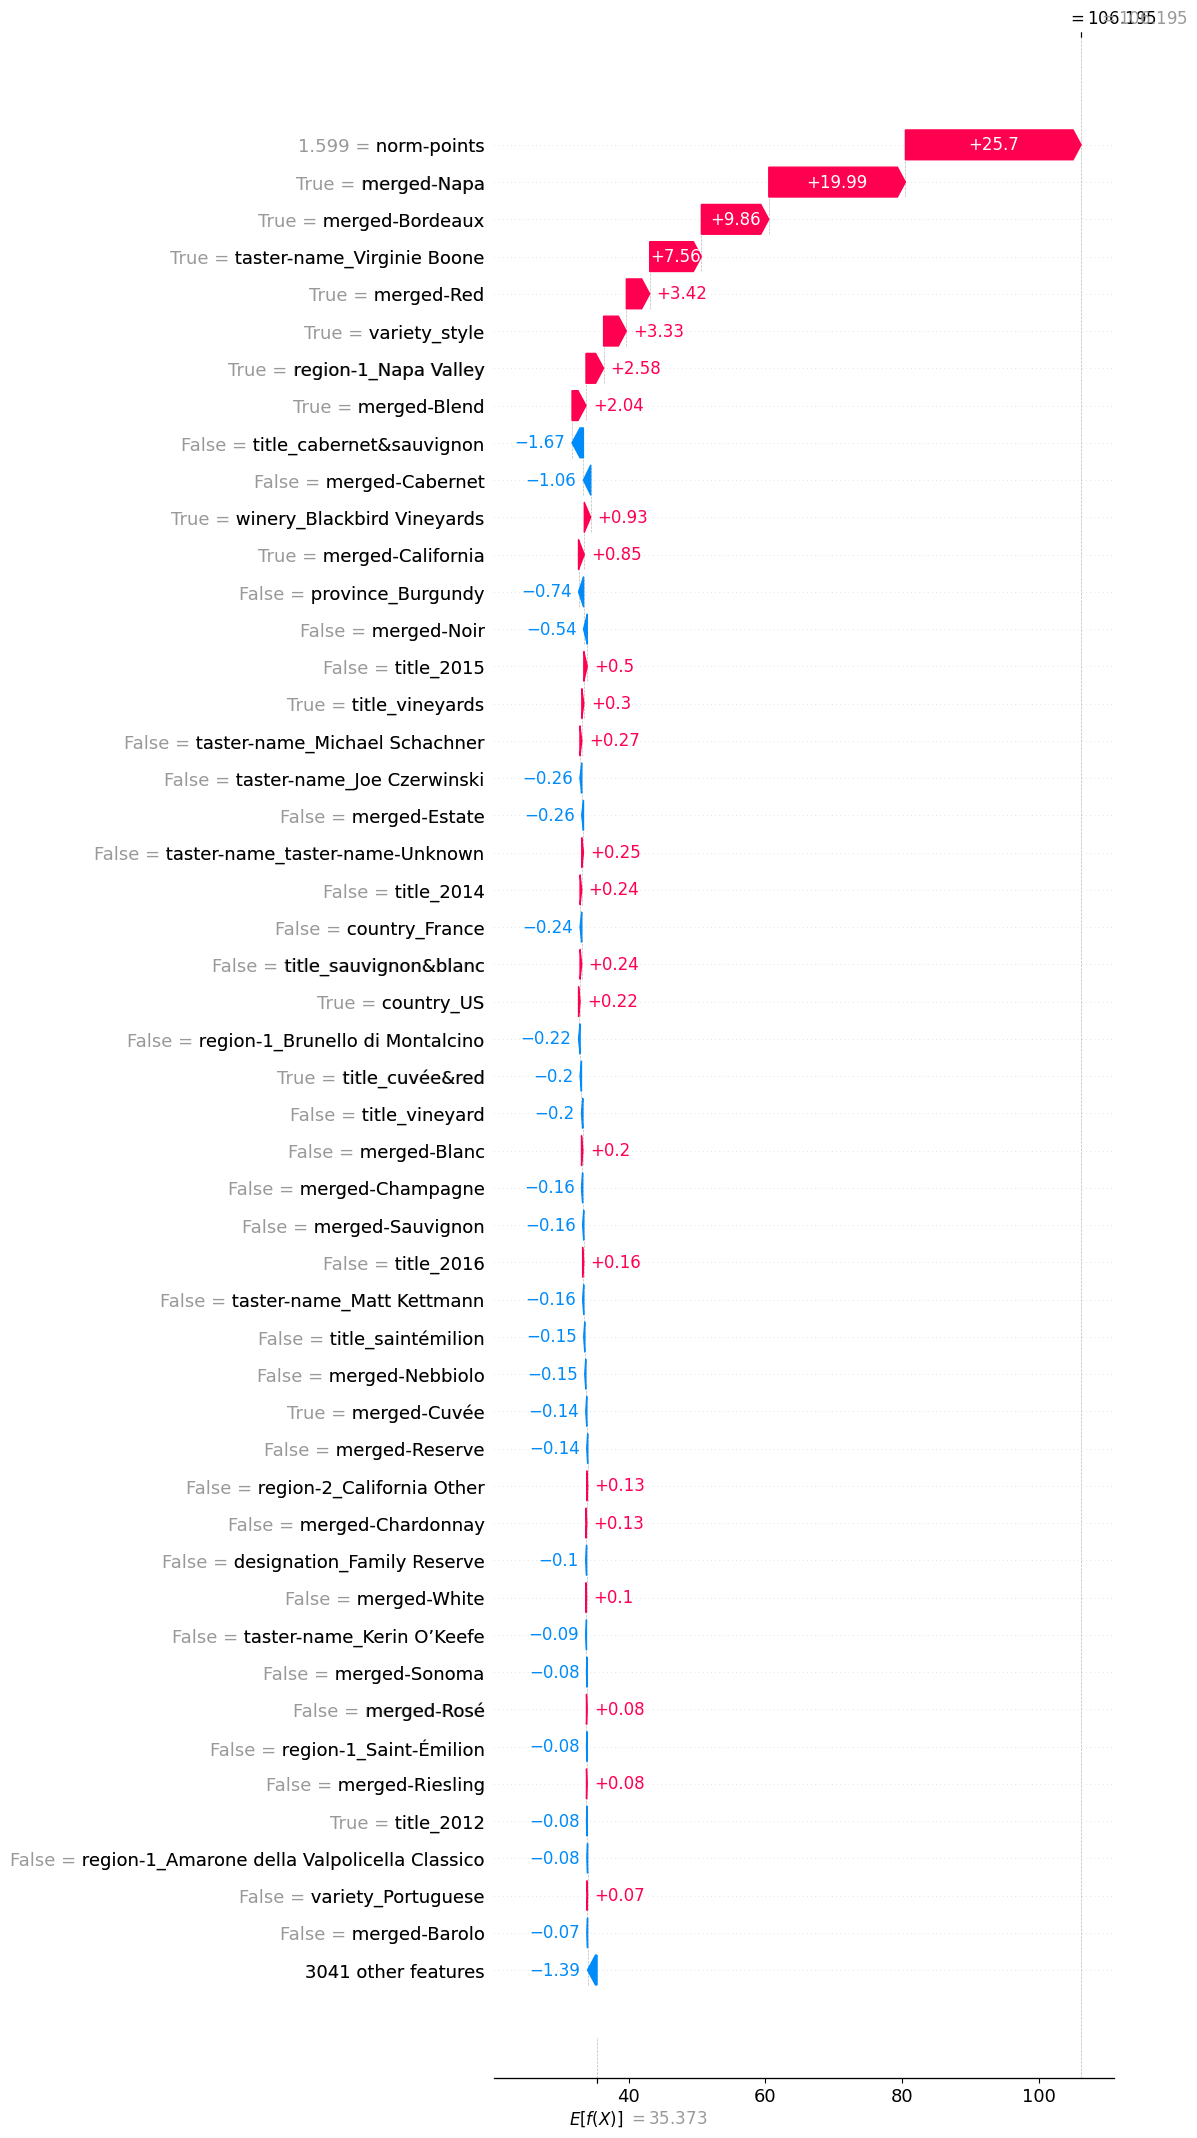

In [106]:
shap.plots.waterfall(explanation[sample_number, :], max_display=50)